# PROJET 5:catégoriser les questions

# Partie 2: Modélisation

## SOMMAIRE  <a class="anchor" id="sommaire"></a>
## [IMPORT DES LIBRAIRIES](#1)<a class="anchor" id="sommaire"></a>
## [MODELES NON SUPERVISES](#2)<a class="anchor" id="sommaire"></a>
## [MODELES SUPERVISES](#3)<a class="anchor" id="sommaire"></a>
## [Approche supervisée à partir de modèle LDA](#4)<a class="anchor" id="sommaire"></a>

## [IMPORT DES LIBRAIRIES](#sommaire)<a class="anchor" id="1"></a>

In [5]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn
import nltk
from nltk.tokenize import word_tokenize
from bs4 import BeautifulSoup
from nltk.stem import WordNetLemmatizer
import wordcloud
from time import time
import re
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.decomposition import NMF, LatentDirichletAllocation
from sklearn.decomposition import NMF, LatentDirichletAllocation
from gensim.models.coherencemodel import CoherenceModel
import gensim
import gensim.corpora as corpora
from gensim.test.utils import datapath
from gensim import utils
import gensim.models
import pprint
#from sklearn.multioutput import 
import pickle
from sklearn.multioutput import MultiOutputClassifier
import yake
from sklearn.metrics import jaccard_score
from sklearn.metrics import hamming_loss

In [6]:
#Building a specific corpus format for some future algorithms
def expandlist(x):
    for i in range(len(x)):
        if i==0:
            strb=str(x[i])
        else:
            strb+=' '+str(x[i])
    return strb

In [7]:
#Loading data
data=pd.read_csv("DataNLP.csv")

In [8]:
def unpack(x):
    x1=x.replace('[\'','').replace('\', \'',' ').replace('\']','')
    return x1
tokenizer = nltk.RegexpTokenizer(r'\w+')
data['FullLem']=data['FullLemExpand'].apply(lambda x:tokenizer.tokenize(x))
data['FullToken']=data['FullToken'].apply(lambda x:tokenizer.tokenize(unpack(x)))
data['TokenTags']=data['TokenTags'].apply(lambda x:tokenizer.tokenize(unpack(x)))

In [9]:
sw={0,
 1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 'a',
 'about',
 'above',
 'add',
 'after',
 'again',
 'against',
 'ain',
 'all',
 'also',
 'am',
 'an',
 'and',
 'any',
 'application',
 'are',
 'aren',
 "aren't",
 'as',
 'at',
 'b',
 'be',
 'because',
 'been',
 'before',
 'being',
 'below',
 'between',
 'both',
 'but',
 'by',
 'can',
 'class',
 'code',
 'com',
 'command',
 'could',
 'couldn',
 "couldn't",
 'create',
 'd',
 'data',
 'did',
 'didn',
 "didn't",
 'div',
 'do',
 'does',
 'doesn',
 "doesn't",
 'doesnt',
 'doing',
 'don',
 "don't",
 'dont',
 'down',
 'during',
 'e',
 'each',
 'error',
 'example',
 'few',
 'file',
 'files',
 'find',
 'first',
 'following',
 'for',
 'from',
 'function',
 'further',
 'get',
 'git',
 'had',
 'hadn',
 "hadn't",
 'has',
 'hasn',
 "hasn't",
 'have',
 'haven',
 "haven't",
 'having',
 'he',
 'her',
 'here',
 'hers',
 'herself',
 'him',
 'himself',
 'his',
 'how',
 'http',
 'i',
 'id',
 'if',
 'im',
 'in',
 'int',
 'into',
 'is',
 'isn',
 "isn't",
 'it',
 "it's",
 'its',
 'itself',
 'ive',
 'just',
 'know',
 'like',
 'line',
 'list',
 'll',
 'm',
 'ma',
 'make',
 'me',
 'method',
 'mightn',
 "mightn't",
 'more',
 'most',
 'mustn',
 "mustn't",
 'my',
 'myself',
 'name',
 'need',
 'needn',
 "needn't",
 'new',
 'no',
 'nor',
 'not',
 'now',
 'null',
 'o',
 'object',
 'of',
 'off',
 'on',
 'once',
 'one',
 'only',
 'or',
 'org',
 'other',
 'our',
 'ours',
 'ourselves',
 'out',
 'over',
 'own',
 'problem',
 'project',
 'public',
 'question',
 're',
 'return',
 'run',
 's',
 'same',
 'see',
 'server',
 'set',
 'shan',
 "shan't",
 'she',
 "she's",
 'should',
 "should've",
 'shouldn',
 "shouldn't",
 'so',
 'some',
 'something',
 'string',
 'such',
 't',
 'table',
 'test',
 'text',
 'than',
 'that',
 "that'll",
 'the',
 'their',
 'theirs',
 'them',
 'themselves',
 'then',
 'there',
 'these',
 'they',
 'this',
 'those',
 'through',
 'time',
 'to',
 'too',
 'tried',
 'true',
 'trying',
 'two',
 'type',
 'under',
 'until',
 'up',
 'use',
 'using',
 'value',
 'var',
 've',
 'very',
 'view',
 'want',
 'was',
 'wasn',
 "wasn't",
 'way',
 'we',
 'were',
 'weren',
 "weren't",
 'what',
 'when',
 'where',
 'which',
 'while',
 'who',
 'whom',
 'why',
 'will',
 'with',
 'won',
 "won't",
 'work',
 'would',
 'wouldn',
 "wouldn't",
 'x',
 'y',
 'you',
 "you'd",
 "you'll",
 "you're",
 "you've",
 'your',
 'yours',
 'yourself',
 'yourselves'}

## [MODELES NON SUPERVISES](#sommaire)<a class="anchor" id="2"></a>

##### TFIDF transformation

Pour pouvoir appliquer les algorithmes d'extraction de tags non supervisés, nous avons d'abord besoin d'utiliser une matrice tfidf qui va encoder les données textes sous format matriciel. 

In [10]:
t0 = time()
vectorizer = TfidfVectorizer(max_features=1000)
X = vectorizer.fit_transform(data['FullLemExpand'])
print("done in %0.3fs." % (time() - t0))

done in 4.068s.


In [11]:
pickle.dump(X, open("vectorizerLDA.pickle", "wb"))

##### Algorithme NMF version sklearn

Nous allons d'abord utiliser l'algorithme NMF de sklearn. 

In [12]:
t0 = time()
nmf = NMF(n_components=100, random_state=1,
          alpha=.1, l1_ratio=.5).fit(X)
print("done in %0.3fs." % (time() - t0))

done in 98.214s.


In [13]:
#fonction permettant d'afficher les topics avec topwords
def print_top_words(model, feature_names, n_top_words):
    for topic_idx, topic in enumerate(model.components_):
        message = "Topic #%d: " % topic_idx
        message += " ".join([feature_names[i]
                             for i in topic.argsort()[:-n_top_words - 1:-1]])
        print(message)
    print()
tfidf_feature_names = vectorizer.get_feature_names()

In [14]:
print_top_words(nmf, tfidf_feature_names, 4)

Topic #0: zero extra field fetch
Topic #1: android layout_width layout_height wrap_content
Topic #2: java lang util apache
Topic #3: array numpy arr length
Topic #4: python py dictionary pip
Topic #5: query select sql join
Topic #6: label title plot figure
Topic #7: difference explain different whats
Topic #8: date format day month
Topic #9: branch master merge remote
Topic #10: foo bar def txt
Topic #11: image png img jpg
Topic #12: key dictionary primary value
Topic #13: hash md generate algorithm
Topic #14: script shell src sh
Topic #15: number random count range
Topic #16: javascript browser alert document
Topic #17: loop foreach break range
Topic #18: row value insert df
Topic #19: input box checked disabled
Topic #20: column dataframe df panda
Topic #21: px width height border
Topic #22: php echo apache www
Topic #23: directory current dir working
Topic #24: variable environment global declare
Topic #25: item foreach collection menu
Topic #26: user email session login
Topic #27: 

##### Algorithme LDA version sklearn

In [15]:
print("Fitting LDA models with tf features, "
      "n_features=%d..."
      % (20))
lda = LatentDirichletAllocation(n_components=150, max_iter=5,
                                learning_method='online',
                                learning_offset=50.,
                                random_state=0)
t0 = time()
lda.fit(X)
print("done in %0.3fs." % (time() - t0))

Fitting LDA models with tf features, n_features=20...
done in 94.273s.


In [33]:
def sort_topic(X):
    listl=[]
    Xmean=X.mean()
    for i in range(len(X[0])):
        if X[0][i]>Xmean:
            listl.append(i)
    return listl
        

In [60]:
def list_topic(X,model):
    return [[vectorizer.get_feature_names()[i] for i in model.components_[h].argsort()[:-1 - 1:-1]][0] for h in sort_topic(model.transform(vectorizer.transform(X)))]

In [484]:
def list_topic2(X,model,cutoff):
    Xd=model.transform(vectorizer.transform([X]))
    listl=[]
    Xmax=Xd.max()
    for i in range(len(Xd[0])):
        if Xd[0][i]>cutoff*Xmax:
            listl.append(i)
    return [[vectorizer.get_feature_names()[i] for i in model.components_[h].argsort()[:-1 - 1:-1]][0] for h in listl]

In [136]:
print("\nTopics in LDA model:")
tf_feature_names = vectorizer.get_feature_names()
print_top_words(lda, tf_feature_names, 4)


Topics in LDA model:
Topic #0: efficient std though hide
Topic #1: request service response api
Topic #2: kind left pattern member
Topic #3: solution present great comment
Topic #4: search symbol book free
Topic #5: zero www wondering couldnt
Topic #6: head related router log
Topic #7: color background red change
Topic #8: many split item open
Topic #9: character eclipse vim space
Topic #10: path bash echo txt
Topic #11: field insert record boolean
Topic #12: thing exception invoke much
Topic #13: difference net url asp
Topic #14: much dictionary sometimes row
Topic #15: there linux result home
Topic #16: alternative unfortunately recent may
Topic #17: icon correct hibernate diff
Topic #18: variable name determine environment
Topic #19: repo widget edit fill_parent
Topic #20: column annotation virtualenv calling
Topic #21: sh bootstrap promise built
Topic #22: branch remote local repository
Topic #23: folder hello directory docker
Topic #24: browser chrome google ie
Topic #25: mac cou

Affichage perplexité

In [85]:
perplexityliste=[]
n_comp=20
for i in range(3,n_comp):
    lda2 = LatentDirichletAllocation(n_components=i, max_iter=5,
        learning_method='online',
        learning_offset=50.,
        random_state=0)
    t0 = time()
    lda2.fit(X)
    print("Step "+str(i)+" done in %0.3fs." % (time() - t0))
    perplexityliste.append(lda2.perplexity(X))

Step 3 done in 73.414s.
Step 4 done in 70.918s.
Step 5 done in 60.178s.
Step 6 done in 60.376s.
Step 7 done in 66.468s.
Step 8 done in 63.646s.
Step 9 done in 57.353s.
Step 10 done in 58.175s.
Step 11 done in 57.258s.
Step 12 done in 63.071s.
Step 13 done in 74.603s.
Step 14 done in 74.359s.
Step 15 done in 63.683s.
Step 16 done in 64.285s.
Step 17 done in 63.635s.
Step 18 done in 63.275s.
Step 19 done in 62.731s.


In [86]:
perplexityliste

[1101.5512605059016,
 1193.3266428326388,
 1336.2588178210513,
 1413.349448671373,
 1522.6914237847423,
 1572.7536426898396,
 1633.3167712216045,
 1714.4881739058605,
 1811.3047607539645,
 1912.7008847345971,
 1970.8323924088152,
 2058.37209990242,
 2110.064349580113,
 2272.3081981608584,
 2276.7205608324048,
 2373.592098701955,
 2453.215271967259]

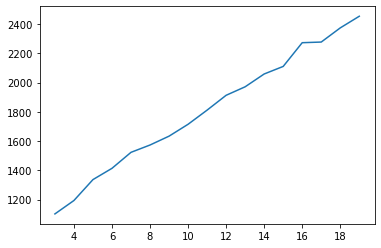

In [87]:
plt.plot(range(3,n_comp),perplexityliste)
plt.show()

Un bug dans l'implémentation de sklearn serait responsable d'une perplexité croissante monotone

Utilisation de library gensim pour LDA

In [89]:
t0 = time()
id2word = corpora.Dictionary(data['FullLem'])
corpus = [id2word.doc2bow(i) for i in data['FullLem']]
lda_model = gensim.models.ldamodel.LdaModel(corpus=corpus,
                                           id2word=id2word,
                                           num_topics=100)
print("done in %0.3fs." % (time() - t0))

done in 122.612s.


In [ ]:
Emploi du model word2vec

In [120]:
#training second model with tags added
t0 = time()
model2 = gensim.models.Word2Vec(sentences=data['FullLem'])
model2.train(sentences=listetag,total_examples=model2.corpus_count,epochs=model2.epochs)
print("done in %0.3fs." % (time() - t0))


done in 27.424s.


In [127]:
model2.wv.most_similar("linux")

[('cygwin', 0.803814172744751),
 ('unix', 0.7774957418441772),
 ('nix', 0.7597947120666504),
 ('gnu', 0.7577620148658752),
 ('bsd', 0.7502720355987549),
 ('mingw', 0.7396177053451538),
 ('xp', 0.7346205711364746),
 ('solaris', 0.7314949035644531),
 ('fedora', 0.7234448194503784),
 ('ubuntu', 0.7109326124191284)]

Coherence Score

In [118]:
list_coherence=[]
for i in range(2,15):
    lda_model = gensim.models.ldamodel.LdaModel(corpus=corpus,
                                           id2word=id2word,
                                           num_topics=i)
    cm = CoherenceModel(model=lda_model, 
                    texts=data['FullLem'],
                    #dictionary=id2word, 
                    coherence='u_mass')
    list_coherence.append(cm.get_coherence())  # get coherence value
    


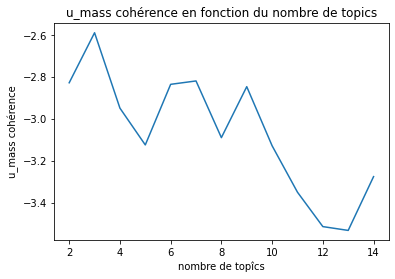

In [119]:
plt.plot(range(2,15),list_coherence)
plt.ylabel('u_mass cohérence')
plt.xlabel('nombre de topîcs')
plt.title('u_mass cohérence en fonction du nombre de topics')
plt.show()

In [98]:
list_perplexity=[]
for i in range(2,35):
    lda_model = gensim.models.ldamodel.LdaModel(corpus=corpus,
                                           id2word=id2word,
                                           num_topics=i)
    list_perplexity.append(lda_model.log_perplexity(corpus))

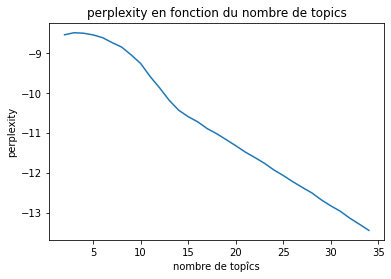

In [101]:
plt.plot(range(2,35),list_perplexity)
plt.ylabel('perplexity')
plt.xlabel('nombre de topîcs')
plt.title('perplexity en fonction du nombre de topics')
plt.show()

In [77]:
data['TokenPrep']=data['TokenTags'].apply(lambda x:[len(x)]+[w for w in x])
data['TagandText']=data['TokenPrep']+data['FullLem']
data['TagandText2']=data['TagandText'].apply(lambda x:[x[i] for i in range(1,x[0]) if x[i] not in x[x[0]:len(x)]]+x[x[0]:len(x)])

In [73]:
data['TextandTag']=data['TokenTags']+data['FullLem']

In [74]:
#initializing list of tags
listetag=[]
for i in data['TokenTags']:
    for j in i:
        listetag.append(j)

Second test with text and tag as training set

In [78]:
#data['TagandText2'] is new dataset

In [79]:
t0=time()
id2word2 = corpora.Dictionary(data['TagandText2'])
corpus2 = [id2word2.doc2bow(i) for i in data['TagandText2']]
lda_model2 = gensim.models.ldamodel.LdaModel(corpus=corpus2,
                                           id2word=id2word2,
                                           num_topics=100)
print("done in %0.3fs." % (time() - t0))

done in 117.168s.


In [80]:
pickle.dump(lda_model2, open("modelLDA.pickle", "wb"))
pickle.dump(id2word2,open("id2wordLDA.pickle", "wb"))

In [194]:
def processing(y):
    tokenizer = nltk.RegexpTokenizer(r'\w+')
    lemmatizer = WordNetLemmatizer() 
    x=BeautifulSoup(y,features="html.parser").get_text()
    x=re.sub(('\d'), '',x)
    x=tokenizer.tokenize(x.lower().replace("'","").replace('(\d+)', ''))
    x=[w for w in x if not w in list(sw)]
    x=[ lemmatizer.lemmatize(w) for w in x]
    return x

In [423]:
def top_topic(x,cutoff):
    other_corpus = [id2word2.doc2bow(x)]
    unseen_doc = other_corpus[0]
    vector = lda_model2[unseen_doc]
    listweight=[]
    for i in range(len(vector)):
        listweight.append(vector[i][1])
    if len(listweight)!=0:
        maxl=max(listweight)
    else:
        maxl=0
    list2=[]
    for i in vector:
        if i[1]>cutoff*maxl:
            list2.append(i[0])    
    return [id2word2[lda_model2.get_topic_terms(h)[0][0]] for h in list2]
    

In [239]:
top_topic(processing('how to commit my python code without bugs'),0.5)

['false', 'python', 'change']

In [289]:
list_topic2(processing('how to commit my python code without bugs'),nmf,0.5)

['change']

In [290]:
list_topic2(processing('how to commit my python code without bugs'),lda,0.5)

['jquery']

YAKE algorithm

In [262]:
def second_tag(x):
    if len(x)<2:
        return ""
    return x[1]

In [263]:
def third_tag(x):
    if len(x)<3:
        return ""
    return x[2]

In [264]:
data['TokenFirstTag']=data['TokenTags'].apply(lambda x:x[0])

In [265]:
data['TokenSecondTag']=data['TokenTags'].apply(lambda x:second_tag(x))

In [266]:
data['TokenThirdTag']=data['TokenTags'].apply(lambda x:third_tag(x))

In [267]:
custom_kw_extractor = yake.KeywordExtractor(n=1,top=1)
keywords = custom_kw_extractor.extract_keywords('how to commit my python code without bugs')


In [268]:
def yake_extractor(x):
    keywords = custom_kw_extractor.extract_keywords(x)
    return keywords[0][0]

In [269]:
data['Yake']=data['FullLemExpand']
data['Yake']=data['Yake'].apply(lambda x:yake_extractor(x))

In [291]:
from sklearn.metrics import accuracy_score
accuracy_score(data['TokenFirstTag'], data['Yake'])


0.07444

Evaluating the different algorithms: 

In [310]:
data['TagandText3']=data['TagandText2'].apply(lambda x:expandlist(x))

In [454]:
#training a tfidf
t0 = time()
vectorizer2= TfidfVectorizer(max_features=10)
vectorizer2.fit(data['TagandText3'])
print("done in %0.3fs." % (time() - t0))

done in 3.130s.


In [383]:
def tagexpand(x,listexp):
    resulte=''
    for i in range(len(x)):
        if resulte=='' and x[i] in listexp:
            resulte=x[i]
        else:
            if x[i] in listexp:
                resulte+=' '+x[i]
    return resulte
    

In [495]:
Sample=data.sample(frac=0.1)
Sample=Sample[Sample['NumberFrequentTags']!=0]

In [497]:
data['TokenTagsExp']=data['TokenFrequentTags']
data['TokenTagsExp']=data['TokenTagsExp'].apply(lambda x:tagexpand(x,liste_frequent_tag))
Sample["LDAGensim"]=Sample['FullLem']
Sample["LDAGensim"]=Sample["LDAGensim"].apply(lambda x:top_topic(x,0.5))
Sample["LDAGensim"]=Sample["LDAGensim"].apply(lambda x:tagexpand(x,liste_frequent_tag))
Sample["LDAsklearn"]=Sample['FullLemExpand'].apply(lambda x:list_topic2(x,lda,0.5))
Sample["LDAsklearn"]=Sample["LDAsklearn"].apply(lambda x:tagexpand(x,liste_frequent_tag))
Sample["NMFsklearn"]=Sample['FullLemExpand'].apply(lambda x:list_topic2(x,nmf,0.5))
Sample["NMFsklearn"]=Sample["NMFsklearn"].apply(lambda x:tagexpand(x,liste_frequent_tag))

In [515]:
ListeSupervise=['Yake','LDAGensim','LDAsklearn','NMFsklearn']
ListeCosine=[]
Xc=vectorizer2.transform(Sample['FullLemExpand'])
for i in ListeSupervise:
    ListeCosine.append(cosine_similarity(vectorizer2.transform(Sample[i]),Xc).mean())
    

In [516]:
ListeCosine

[0.003505346167468441,
 0.012200130596917462,
 0.006626365624297643,
 0.009754882370212473]

| Model | Yake   | LDAGensim   | LDAsklearn   | NMFsklearn   |
|------|------|------|------|------|
| Cosine Similarity  | 0.0035| 0.012   | 0.0066   | 0.0097   |

In [ ]:
Adding sklearn model with textandtag2 as learning material

In [517]:
vectorizer = TfidfVectorizer(max_features=1000)
X = vectorizer.fit_transform(data['TagandText3'])

In [518]:
ldatag = LatentDirichletAllocation(n_components=150, max_iter=5,
                                learning_method='online',
                                learning_offset=50.,
                                random_state=0)
ldatag.fit(X)
nmftag = NMF(n_components=100, random_state=1,
          alpha=.1, l1_ratio=.5).fit(X)
nmftag.fit(X)

NMF(alpha=0.1, l1_ratio=0.5, n_components=100, random_state=1)

In [519]:
Sample["LDAtagsklearn"]=Sample['FullLemExpand'].apply(lambda x:list_topic2(x,ldatag,0.5))
Sample["LDAtagsklearn"]=Sample["LDAtagsklearn"].apply(lambda x:tagexpand(x,liste_frequent_tag))
Sample["NMFtagsklearn"]=Sample['FullLemExpand'].apply(lambda x:list_topic2(x,nmftag,0.5))
Sample["NMFtagsklearn"]=Sample["NMFtagsklearn"].apply(lambda x:tagexpand(x,liste_frequent_tag))

In [520]:
cosine_similarity(vectorizer2.transform(Sample["NMFtagsklearn"]),Xc).mean()

0.008905173823583343

In [522]:
cosine_similarity(vectorizer2.transform(Sample["LDAtagsklearn"]),Xc).mean()

0.0069752332452687315

| Model | Yake   | LDAGensim   | LDAsklearn   | NMFsklearn   |LDAtagsklearn   |NMFtagsklearn   |
|------|------|------|------|------|------|------|
| Cosine Similarity  | 0.0035| 0.012   | 0.0066   | 0.0097   |0.0069   |0.0089   |

## [MODELES SUPERVISES](#sommaire)<a class="anchor" id="3"></a>

In [26]:
#initializing list of tags
listetag=[]
for i in data['TokenTags']:
    for j in i:
        listetag.append(j)
Tag=pd.DataFrame(listetag)
liste_frequent_tag=[i for i in Tag[0].value_counts().head(150).index]
for i in range(0,30):
    if str(i) in liste_frequent_tag:
        liste_frequent_tag.remove(str(i))
data['TokenFrequentTags']=0
data['TokenFrequentTags']=data['TokenTags'].apply(lambda x:[w for w in x if w in liste_frequent_tag])
data['NumberFrequentTags']=data['TokenFrequentTags'].apply(lambda x:len(x))

In [27]:
data['TokenFrequentTags']

0                        [java, c, performance, branch]
1                          [git, version, control, git]
2        [git, version, control, git, branch, git, git]
3                     [git, version, control, git, git]
4                                              [python]
                              ...                      
49995                               [c, visual, studio]
49996                                       [html, css]
49997                                      [mysql, sql]
49998                                            [java]
49999                                               [c]
Name: TokenFrequentTags, Length: 50000, dtype: object

In [28]:
#We only keep posts with a tag and less than 5 tags
data2=data[(data['NumberFrequentTags']!=0)&(data['NumberFrequentTags']<5)]
#New Dataframe
data3=pd.DataFrame(data2['FullLem'])
data3['TokenFrequentTags']=data2['TokenFrequentTags']

In [29]:
data3['FullLemExpand']=data3['FullLem'].apply(lambda x:expandlist(x))        

In [30]:
t0 = time()
vectorizer = TfidfVectorizer(max_features=1000)
X = vectorizer.fit_transform(data3['FullLemExpand'])
print("done in %0.3fs." % (time() - t0))

done in 2.496s.


In [193]:
#Pickle dump for API
pickle.dump(vectorizer, open("vectorizer.pickle", "wb"))

Manual OneHotEncoding

In [38]:
for i in liste_frequent_tag:
    data3[i]=0
    data3[i]=data3['TokenFrequentTags'].apply(lambda x:1 if i in x else 0)
y=data3[liste_frequent_tag].values


Split training/test

In [195]:
X=X.toarray()
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)

Test modèle

In [30]:
listModel=[]
listtime=[]
listscore=[]
listjaccard=[]
listhamming=[]

In [31]:
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier(random_state=0)
listModel.append('DecisionTree')
t0 = time()
clf.fit(X_train, y_train)
runtime=(time() - t0)
listtime.append(runtime)
print("done in %0.3fs." % runtime)
listscore.append(clf.score(X_test,y_test))
listjaccard.append(jaccard_score(y_test,clf.predict(X_test),average='weighted'))
listhamming.append(hamming_loss(y_test,clf.predict(X_test)))

done in 160.957s.


In [32]:
hamming_loss(y_test,clf.predict(X_test))

0.01245300175270688

In [33]:
jaccard_score(y_test,clf.predict(X_test),average='weighted')

0.37041442144903514

In [34]:
from sklearn.ensemble import ExtraTreesClassifier
clf2 = ExtraTreesClassifier(n_estimators=100, random_state=0)
listModel.append('ExtraTrees')
t0 = time()
clf2.fit(X_train, y_train)
runtime=(time() - t0)
listtime.append(runtime)
print("done in %0.3fs." % runtime)
listscore.append(clf2.score(X_test,y_test))
listjaccard.append(jaccard_score(y_test,clf2.predict(X_test),average='weighted'))
listhamming.append(hamming_loss(y_test,clf2.predict(X_test)))

done in 706.374s.


In [35]:
hamming_loss(y_test,clf2.predict(X_test))

0.00874609774085512

In [36]:
jaccard_score(y_test,clf2.predict(X_test),average='weighted')

0.38049520814069193

In [38]:
from sklearn.neural_network import MLPClassifier
clf5 = MLPClassifier()
listModel.append('MLPClassifier')
t0 = time()
clf5.fit(X_train, y_train)
runtime=(time() - t0)
listtime.append(runtime)
print("done in %0.3fs." % runtime)
score=clf5.score(X_test,y_test)
print(score)
listscore.append(score)
listjaccard.append(jaccard_score(y_test,clf5.predict(X_test),average='weighted'))
listhamming.append(hamming_loss(y_test,clf5.predict(X_test)))

C:\Users\fried\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:585: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


done in 422.076s.
0.2508650519031142


In [40]:
hamming_loss(y_test,clf5.predict(X_test))

0.010553697798202345

In [39]:
jaccard_score(y_test,clf5.predict(X_test),average='weighted')

0.4236451745851132

In [41]:
from sklearn.linear_model import LogisticRegression
clf7 = MultiOutputClassifier(LogisticRegression())
listModel.append('LogisticRegression')
t0 = time()
clf7.fit(X_train, y_train)
runtime=(time() - t0)
listtime.append(runtime)
print("done in %0.3fs." % runtime)
score=clf7.score(X_test,y_test)
print(score)
listscore.append(score)
listjaccard.append(jaccard_score(y_test,clf7.predict(X_test),average='weighted'))
listhamming.append(hamming_loss(y_test,clf7.predict(X_test)))

done in 372.363s.
0.26188308140593697


In [42]:
from sklearn.linear_model import SGDClassifier
clf8 = MultiOutputClassifier(SGDClassifier())
listModel.append('SGDClassifier')
t0 = time()
clf8.fit(X_train, y_train)
runtime=(time() - t0)
listtime.append(runtime)
print("done in %0.3fs." % runtime)
score=clf8.score(X_test,y_test)
print(score)
listscore.append(score)
listjaccard.append(jaccard_score(y_test,clf8.predict(X_test),average='weighted'))
listhamming.append(hamming_loss(y_test,clf8.predict(X_test)))

done in 86.934s.
0.27299216900382445


In [43]:
from sklearn.naive_bayes import MultinomialNB
clf81 = MultiOutputClassifier(MultinomialNB())
listModel.append('MultinomialNB')
t0 = time()
clf81.fit(X_train, y_train)
runtime=(time() - t0)
listtime.append(runtime)
print("done in %0.3fs." % runtime)
score=clf8.score(X_test,y_test)
print(score)
listscore.append(score)
listjaccard.append(jaccard_score(y_test,clf81.predict(X_test),average='weighted'))
listhamming.append(hamming_loss(y_test,clf81.predict(X_test)))

done in 17.030s.
0.27299216900382445


In [44]:
from sklearn.linear_model import PassiveAggressiveClassifier
clf10 = MultiOutputClassifier(PassiveAggressiveClassifier())
listModel.append('PassiveAggressiveClassifier')
t0 = time()
clf10.fit(X_train, y_train)
runtime=(time() - t0)
listtime.append(runtime)
print("done in %0.3fs." % runtime)
score=clf10.score(X_test,y_test)
print(score)
listscore.append(score)
listjaccard.append(jaccard_score(y_test,clf10.predict(X_test),average='weighted'))
listhamming.append(hamming_loss(y_test,clf10.predict(X_test)))

done in 170.676s.
0.24385357858313603


In [45]:
from sklearn.svm import LinearSVC
clf9 = MultiOutputClassifier(LinearSVC())
listModel.append('LinearSVC')
t0 = time()
clf9.fit(X_train, y_train)
runtime=(time() - t0)
listtime.append(runtime)
print("done in %0.3fs." % runtime)
score=clf9.score(X_test,y_test)
print(score)
listscore.append(score)
listjaccard.append(jaccard_score(y_test,clf9.predict(X_test),average='weighted'))
listhamming.append(hamming_loss(y_test,clf9.predict(X_test)))

done in 49.627s.
0.297395738481151


In [123]:
pickle.dump(clf9, open("modelSVC.pickle", "wb"))

In [47]:
listjaccard

[0.37041442144903514,
 0.38049520814069193,
 0.4236451745851132,
 0.37388671834669607,
 0.37207677169711706,
 0.18137669472145934,
 0.40616293890204463,
 0.42812286464049565]

In [169]:
jaccard_score(y_test,clf9.predict(X_test),average='weighted')

0.4191956360712821

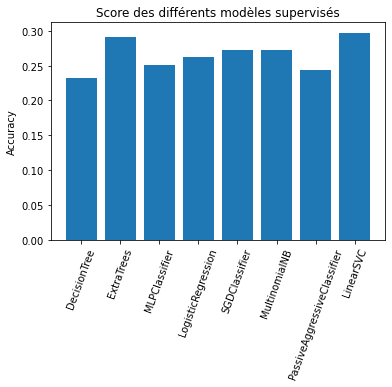

In [105]:
plt.bar(listModel,listscore)
plt.xticks(rotation=70)
plt.ylabel('Accuracy')
plt.title('Score des différents modèles supervisés')
plt.show()

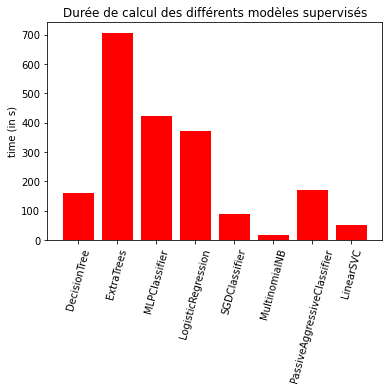

In [143]:
plt.bar(listModel,listtime,color="red")
plt.xticks(rotation=75)
plt.ylabel('time (in s)')
plt.title('Durée de calcul des différents modèles supervisés')
plt.show()

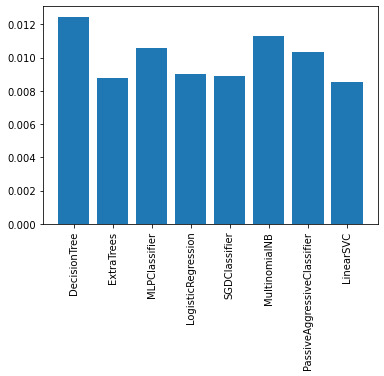

In [48]:
plt.bar(listModel,listhamming)
plt.xticks(rotation=90)

plt.show()

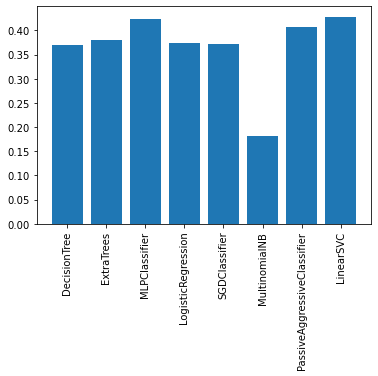

In [59]:
plt.bar(listModel,listjaccard)
plt.xticks(rotation=90)

plt.show()

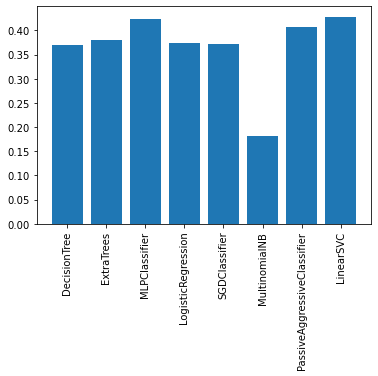

In [201]:
plt.bar(listModel,listjaccard)
plt.xticks(rotation=90)

plt.show()

Optimisation hyperparamètre for linearSVC

In [176]:
import numpy as np

In [183]:
C_param=np.logspace(-1.2,1.8,10)

In [199]:
scorel1=[]
scorel2=[]

In [200]:
for i in C_param:
    clfl1 = MultiOutputClassifier(LinearSVC(C=i,penalty="l1",dual=False))
    clfl2 = MultiOutputClassifier(LinearSVC(C=i,penalty="l2"))
    clfl1.fit(X_train, y_train)
    clfl2.fit(X_train, y_train)

    scorel1.append(clfl1.score(X_test,y_test))
    scorel2.append(clfl2.score(X_test,y_test))


C:\Users\fried\anaconda3\lib\site-packages\sklearn\svm\_base.py:977: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\fried\anaconda3\lib\site-packages\sklearn\svm\_base.py:977: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\fried\anaconda3\lib\site-packages\sklearn\svm\_base.py:977: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\fried\anaconda3\lib\site-packages\sklearn\svm\_base.py:977: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\fried\anaconda3\lib\site-packages\sklearn\svm\_base.py:977: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iteration

C:\Users\fried\anaconda3\lib\site-packages\sklearn\svm\_base.py:977: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\fried\anaconda3\lib\site-packages\sklearn\svm\_base.py:977: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\fried\anaconda3\lib\site-packages\sklearn\svm\_base.py:977: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\fried\anaconda3\lib\site-packages\sklearn\svm\_base.py:977: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\fried\anaconda3\lib\site-packages\sklearn\svm\_base.py:977: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iteration

C:\Users\fried\anaconda3\lib\site-packages\sklearn\svm\_base.py:977: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\fried\anaconda3\lib\site-packages\sklearn\svm\_base.py:977: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\fried\anaconda3\lib\site-packages\sklearn\svm\_base.py:977: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\fried\anaconda3\lib\site-packages\sklearn\svm\_base.py:977: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\fried\anaconda3\lib\site-packages\sklearn\svm\_base.py:977: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iteration

C:\Users\fried\anaconda3\lib\site-packages\sklearn\svm\_base.py:977: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\fried\anaconda3\lib\site-packages\sklearn\svm\_base.py:977: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\fried\anaconda3\lib\site-packages\sklearn\svm\_base.py:977: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\fried\anaconda3\lib\site-packages\sklearn\svm\_base.py:977: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\fried\anaconda3\lib\site-packages\sklearn\svm\_base.py:977: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iteration

C:\Users\fried\anaconda3\lib\site-packages\sklearn\svm\_base.py:977: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\fried\anaconda3\lib\site-packages\sklearn\svm\_base.py:977: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\fried\anaconda3\lib\site-packages\sklearn\svm\_base.py:977: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\fried\anaconda3\lib\site-packages\sklearn\svm\_base.py:977: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\fried\anaconda3\lib\site-packages\sklearn\svm\_base.py:977: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iteration

C:\Users\fried\anaconda3\lib\site-packages\sklearn\svm\_base.py:977: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\fried\anaconda3\lib\site-packages\sklearn\svm\_base.py:977: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\fried\anaconda3\lib\site-packages\sklearn\svm\_base.py:977: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\fried\anaconda3\lib\site-packages\sklearn\svm\_base.py:977: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\fried\anaconda3\lib\site-packages\sklearn\svm\_base.py:977: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iteration

C:\Users\fried\anaconda3\lib\site-packages\sklearn\svm\_base.py:977: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\fried\anaconda3\lib\site-packages\sklearn\svm\_base.py:977: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\fried\anaconda3\lib\site-packages\sklearn\svm\_base.py:977: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\fried\anaconda3\lib\site-packages\sklearn\svm\_base.py:977: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\fried\anaconda3\lib\site-packages\sklearn\svm\_base.py:977: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iteration

C:\Users\fried\anaconda3\lib\site-packages\sklearn\svm\_base.py:977: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\fried\anaconda3\lib\site-packages\sklearn\svm\_base.py:977: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\fried\anaconda3\lib\site-packages\sklearn\svm\_base.py:977: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\fried\anaconda3\lib\site-packages\sklearn\svm\_base.py:977: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\fried\anaconda3\lib\site-packages\sklearn\svm\_base.py:977: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iteration

C:\Users\fried\anaconda3\lib\site-packages\sklearn\svm\_base.py:977: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\fried\anaconda3\lib\site-packages\sklearn\svm\_base.py:977: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\fried\anaconda3\lib\site-packages\sklearn\svm\_base.py:977: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\fried\anaconda3\lib\site-packages\sklearn\svm\_base.py:977: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\fried\anaconda3\lib\site-packages\sklearn\svm\_base.py:977: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iteration

C:\Users\fried\anaconda3\lib\site-packages\sklearn\svm\_base.py:977: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\fried\anaconda3\lib\site-packages\sklearn\svm\_base.py:977: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\fried\anaconda3\lib\site-packages\sklearn\svm\_base.py:977: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\fried\anaconda3\lib\site-packages\sklearn\svm\_base.py:977: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\fried\anaconda3\lib\site-packages\sklearn\svm\_base.py:977: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iteration

C:\Users\fried\anaconda3\lib\site-packages\sklearn\svm\_base.py:977: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\fried\anaconda3\lib\site-packages\sklearn\svm\_base.py:977: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\fried\anaconda3\lib\site-packages\sklearn\svm\_base.py:977: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\fried\anaconda3\lib\site-packages\sklearn\svm\_base.py:977: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\fried\anaconda3\lib\site-packages\sklearn\svm\_base.py:977: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iteration

C:\Users\fried\anaconda3\lib\site-packages\sklearn\svm\_base.py:977: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\fried\anaconda3\lib\site-packages\sklearn\svm\_base.py:977: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\fried\anaconda3\lib\site-packages\sklearn\svm\_base.py:977: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\fried\anaconda3\lib\site-packages\sklearn\svm\_base.py:977: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\fried\anaconda3\lib\site-packages\sklearn\svm\_base.py:977: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iteration

C:\Users\fried\anaconda3\lib\site-packages\sklearn\svm\_base.py:977: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\fried\anaconda3\lib\site-packages\sklearn\svm\_base.py:977: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\fried\anaconda3\lib\site-packages\sklearn\svm\_base.py:977: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\fried\anaconda3\lib\site-packages\sklearn\svm\_base.py:977: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\fried\anaconda3\lib\site-packages\sklearn\svm\_base.py:977: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iteration

C:\Users\fried\anaconda3\lib\site-packages\sklearn\svm\_base.py:977: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\fried\anaconda3\lib\site-packages\sklearn\svm\_base.py:977: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\fried\anaconda3\lib\site-packages\sklearn\svm\_base.py:977: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\fried\anaconda3\lib\site-packages\sklearn\svm\_base.py:977: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\fried\anaconda3\lib\site-packages\sklearn\svm\_base.py:977: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iteration

C:\Users\fried\anaconda3\lib\site-packages\sklearn\svm\_base.py:977: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\fried\anaconda3\lib\site-packages\sklearn\svm\_base.py:977: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\fried\anaconda3\lib\site-packages\sklearn\svm\_base.py:977: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\fried\anaconda3\lib\site-packages\sklearn\svm\_base.py:977: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\fried\anaconda3\lib\site-packages\sklearn\svm\_base.py:977: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iteration

C:\Users\fried\anaconda3\lib\site-packages\sklearn\svm\_base.py:977: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\fried\anaconda3\lib\site-packages\sklearn\svm\_base.py:977: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\fried\anaconda3\lib\site-packages\sklearn\svm\_base.py:977: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\fried\anaconda3\lib\site-packages\sklearn\svm\_base.py:977: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\fried\anaconda3\lib\site-packages\sklearn\svm\_base.py:977: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iteration

C:\Users\fried\anaconda3\lib\site-packages\sklearn\svm\_base.py:977: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\fried\anaconda3\lib\site-packages\sklearn\svm\_base.py:977: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\fried\anaconda3\lib\site-packages\sklearn\svm\_base.py:977: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\fried\anaconda3\lib\site-packages\sklearn\svm\_base.py:977: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\fried\anaconda3\lib\site-packages\sklearn\svm\_base.py:977: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iteration

C:\Users\fried\anaconda3\lib\site-packages\sklearn\svm\_base.py:977: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\fried\anaconda3\lib\site-packages\sklearn\svm\_base.py:977: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\fried\anaconda3\lib\site-packages\sklearn\svm\_base.py:977: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\fried\anaconda3\lib\site-packages\sklearn\svm\_base.py:977: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\fried\anaconda3\lib\site-packages\sklearn\svm\_base.py:977: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iteration

C:\Users\fried\anaconda3\lib\site-packages\sklearn\svm\_base.py:977: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\fried\anaconda3\lib\site-packages\sklearn\svm\_base.py:977: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\fried\anaconda3\lib\site-packages\sklearn\svm\_base.py:977: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\fried\anaconda3\lib\site-packages\sklearn\svm\_base.py:977: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\fried\anaconda3\lib\site-packages\sklearn\svm\_base.py:977: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iteration

C:\Users\fried\anaconda3\lib\site-packages\sklearn\svm\_base.py:977: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\fried\anaconda3\lib\site-packages\sklearn\svm\_base.py:977: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\fried\anaconda3\lib\site-packages\sklearn\svm\_base.py:977: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\fried\anaconda3\lib\site-packages\sklearn\svm\_base.py:977: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\fried\anaconda3\lib\site-packages\sklearn\svm\_base.py:977: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iteration

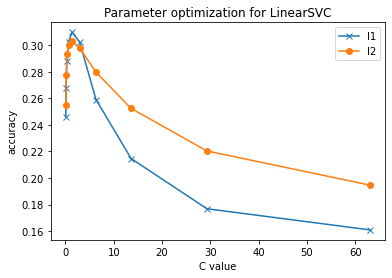

In [207]:
plt.plot(C_param,scorel1,marker='x',label='l1')
plt.plot(C_param,scorel2,marker='o',label='l2')
plt.legend()
plt.xlabel('C value')
plt.ylabel('accuracy')
plt.title('Parameter optimization for LinearSVC')

plt.show()

In [210]:
from sklearn.svm import LinearSVC
clf9 = MultiOutputClassifier(LinearSVC(C=1.35,penalty="l1",dual=False))
t0 = time()
clf9.fit(X_train, y_train)
runtime=(time() - t0)
print("done in %0.3fs." % runtime)
score=clf9.score(X_test,y_test)
print(score)

done in 225.988s.
0.3097796394099435


In [211]:
pickle.dump(clf9, open("modelSVC.pickle", "wb"))

Modèle supervisé avec une seule étiquette

In [52]:
#We only keep posts with a tag and less than 5 tags
data5=data[data['NumberFrequentTags']==1]
#New Dataframe
data6=pd.DataFrame(data5['FullLem'])
data6['TokenFrequentTags']=data5['TokenFrequentTags']
data6['FullLemExpand']=data6['FullLem'].apply(lambda x:expandlist(x)) 

In [113]:
listscore2=[]
listModel2=[]

In [107]:
t0 = time()
vectorizer = TfidfVectorizer(max_features=1000)
X = vectorizer.fit_transform(data6['FullLemExpand'])
print("done in %0.3fs." % (time() - t0))


done in 8.999s.


In [108]:
X=X.toarray()

In [109]:
id2word6 = corpora.Dictionary(data6['TokenFrequentTags'])
data6['cat']=0
data6['cat']=data6['TokenFrequentTags'].apply(lambda x:id2word6.token2id[x[0]])

In [110]:
y=data6['cat'].values

In [111]:

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)

In [114]:
from sklearn.svm import LinearSVC
clf91 = LinearSVC()
listModel2.append('LinearSVC')
t0 = time()
clf91.fit(X_train, y_train)
runtime=(time() - t0)
print("done in %0.3fs." % runtime)
score=clf91.score(X_test,y_test)
print(score)
listscore2.append(score)

done in 1.811s.
0.7126341866226259


In [115]:
from sklearn.ensemble import ExtraTreesClassifier
clf2 = ExtraTreesClassifier(n_estimators=100, random_state=0)
listModel2.append('ExtraTreesClassifier')
t0 = time()
clf2.fit(X_train, y_train)
runtime=(time() - t0)
print("done in %0.3fs." % runtime)
score=clf2.score(X_test,y_test)
print(score)
print(score)
listscore2.append(score)

done in 91.852s.
0.7241948802642444
0.7241948802642444


In [116]:
from sklearn.ensemble import RandomForestClassifier
clf2 = RandomForestClassifier(n_estimators=100, random_state=0)
listModel2.append('RandomForestClassifier')
t0 = time()
clf2.fit(X_train, y_train)
runtime=(time() - t0)
print("done in %0.3fs." % runtime)
score=clf2.score(X_test,y_test)
print(score)
listscore2.append(score)

done in 43.518s.
0.7167630057803468


In [117]:
from sklearn.neural_network import MLPClassifier
clf5 = MLPClassifier()
listModel2.append('MLPClassifier')
t0 = time()
clf5.fit(X_train, y_train)
runtime=(time() - t0)
print("done in %0.3fs." % runtime)
score=clf5.score(X_test,y_test)
print(score)
listscore2.append(score)

done in 148.061s.
0.6639141205615194


C:\Users\fried\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:585: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


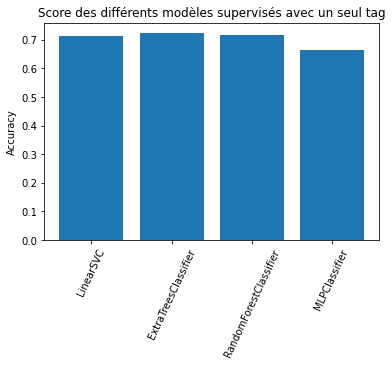

In [137]:
plt.bar(listModel2,listscore2)
plt.xticks(rotation=65)
plt.ylabel('Accuracy')
plt.title('Score des différents modèles supervisés avec un seul tag')
plt.show()

Predict number of tags to see if it matches

In [157]:
#We only keep posts with a tag and less than 5 tags
data5=data[data['NumberFrequentTags']<5]
#New Dataframe
data6=pd.DataFrame(data5['FullLem'])
data6['TokenFrequentTags']=data5['TokenFrequentTags']
data6['FullLemExpand']=data6['FullLem'].apply(lambda x:expandlist(x)) 

In [158]:
t0 = time()
vectorizer = TfidfVectorizer(max_features=1000)
X = vectorizer.fit_transform(data6['FullLemExpand'])
print("done in %0.3fs." % (time() - t0))
X=X.toarray()

done in 2.844s.


In [159]:
y=data5['NumberFrequentTags'].values
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)

In [167]:
listetargetnumber=[]
listModel3=[]

In [168]:
from sklearn.svm import LinearSVC
clf9 = LinearSVC()
listModel3.append('LinearSVC')
t0 = time()
clf9.fit(X_train, y_train)
runtime=(time() - t0)
listtime.append(runtime)
print("done in %0.3fs." % runtime)
score=clf9.score(X_test,y_test)
listetargetnumber.append(score)
print(score)

done in 3.299s.
0.3864064372538949


In [169]:
from sklearn.ensemble import ExtraTreesClassifier
clf2 = ExtraTreesClassifier(n_estimators=100, random_state=0)
listModel3.append('ExtraTreesClassifier')
t0 = time()
clf2.fit(X_train, y_train)
runtime=(time() - t0)
listtime.append(runtime)
print("done in %0.3fs." % runtime)
score=clf2.score(X_test,y_test)
listetargetnumber.append(score)
print(score)

done in 310.731s.
0.39188495120698513


In [170]:
from sklearn.ensemble import RandomForestClassifier
clf2 = RandomForestClassifier(n_estimators=100, random_state=0)
listModel3.append('RandomForestClassifier')
t0 = time()
clf2.fit(X_train, y_train)
runtime=(time() - t0)
print("done in %0.3fs." % runtime)
score=clf2.score(X_test,y_test)
print(score)
listetargetnumber.append(score)

done in 159.713s.
0.39342578325629174


In [171]:
from sklearn.neural_network import MLPClassifier
clf5 = MLPClassifier()
listModel3.append('MLPClassifier')
t0 = time()
clf5.fit(X_train, y_train)
runtime=(time() - t0)
print("done in %0.3fs." % runtime)
score=clf5.score(X_test,y_test)
print(score)
listetargetnumber.append(score)

done in 265.621s.
0.33727101523711694


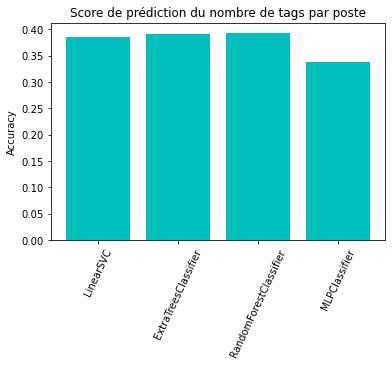

In [174]:
plt.bar(listModel3,listetargetnumber,color='c')
plt.xticks(rotation=65)
plt.ylabel('Accuracy')
plt.title('Score de prédiction du nombre de tags par poste')
plt.show()

Algo has difficulty predicting number of tags

## [Approche supervisée à partir de modèle LDA ou NMF](#sommaire)<a class="anchor" id="4"></a>

In [81]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.svm import LinearSVC

In [33]:
t0=time()
id2word3 = corpora.Dictionary(data2['FullLem'])
corpus3 = [id2word3.doc2bow(i) for i in data2['FullLem']]
lda_model3 = gensim.models.ldamodel.LdaModel(corpus=corpus3,
                                           id2word=id2word3,
                                           num_topics=150)
print("done in %0.3fs." % (time() - t0))
vector5=lda_model3.get_document_topics(corpus3,minimum_probability=0)
vector6=pd.DataFrame(vector5)
for i in vector6.columns:
    vector6[i]=vector6[i].apply(lambda x:x[1])

Scaler=StandardScaler()
vector6=Scaler.fit_transform(vector6.values)
X_train2, X_test2, y_train2, y_test2 = train_test_split(vector6, y, test_size=0.25)
clf = MultiOutputClassifier(LinearSVC(C=1.5,max_iter=5000,dual=False))
t0 = time()
clf.fit(X_train2, y_train2)
runtime=(time() - t0)
print("done in %0.3fs." % runtime)

Test with NMF

In [45]:
t0 = time()
vectorizer = TfidfVectorizer(max_features=1000)
X = vectorizer.fit_transform(data2['FullLemExpand'])
print("done in %0.3fs." % (time() - t0))

done in 3.450s.


In [46]:
t0 = time()
nmf = NMF(n_components=100, random_state=1,
          alpha=.1, l1_ratio=.5).fit(X)
print("done in %0.3fs." % (time() - t0))

done in 83.808s.


In [55]:
Xbis=X*np.transpose(nmf.components_)
Xbis=pd.DataFrame(Xbis)
Scaler=StandardScaler()
Xbis=Scaler.fit_transform(Xbis.values)
X_train3, X_test3, y_train3, y_test3 = train_test_split(Xbis, y, test_size=0.25)

In [71]:
from sklearn.svm import LinearSVC
clf = MultiOutputClassifier(LinearSVC(C=1.5,max_iter=5000,dual=False))
t0 = time()
clf.fit(X_train3, y_train3)
runtime=(time() - t0)
print("done in %0.3fs." % runtime)
score=clf.score(X_test3,y_test3)
print(score)

done in 238.251s.
0.212529593880896


##### Comparing accuracy with number of topics:

In [84]:
Numbertopic=[5,10,20,50,100,150]
listetopic=[]
models=['LDA','NMF']
for j in models:
    for i in Numbertopic:
        listetopic.append(str(j)+' '+str(i))
    

In [90]:
listejaccard=[]
listscore=[]

In [91]:
for i in Numbertopic:
    t0=time()
    id2word3 = corpora.Dictionary(data2['FullLem'])
    corpus3 = [id2word3.doc2bow(i) for i in data2['FullLem']]
    lda_model3 = gensim.models.ldamodel.LdaModel(corpus=corpus3,
                                               id2word=id2word3,
                                               num_topics=i)
    print("done in %0.3fs." % (time() - t0))
    vector5=lda_model3.get_document_topics(corpus3,minimum_probability=0)
    vector6=pd.DataFrame(vector5)
    for i in vector6.columns:
        vector6[i]=vector6[i].apply(lambda x:x[1])

    Scaler=StandardScaler()
    vector6=Scaler.fit_transform(vector6.values)
    X_train2, X_test2, y_train2, y_test2 = train_test_split(vector6, y, test_size=0.25)
    clf = MultiOutputClassifier(LinearSVC(C=1.5,max_iter=5000,dual=False))
    t0 = time()
    clf.fit(X_train2, y_train2)
    runtime=(time() - t0)
    print("done in %0.3fs." % runtime)
    listescore.append(clf.score(X_test2,y_test2))
    listejaccard.append(jaccard_score(y_test2,clf.predict(X_test2),average='weighted'))
for i in Numbertopic:
    t0 = time()
    vectorizer = TfidfVectorizer(max_features=1000)
    X = vectorizer.fit_transform(data2['FullLemExpand'])
    print("done in %0.3fs." % (time() - t0))
    t0 = time()
    nmf = NMF(n_components=i, random_state=1,
    alpha=.1, l1_ratio=.5).fit(X)
    print("done in %0.3fs." % (time() - t0))
    Xbis=X*np.transpose(nmf.components_)
    Xbis=pd.DataFrame(Xbis)
    Scaler=StandardScaler()
    Xbis=Scaler.fit_transform(Xbis.values)
    X_train3, X_test3, y_train3, y_test3 = train_test_split(Xbis, y, test_size=0.25)
    clf = MultiOutputClassifier(LinearSVC(C=1.5,max_iter=5000,dual=False))
    t0 = time()
    clf.fit(X_train3, y_train3)
    runtime=(time() - t0)
    print("done in %0.3fs." % runtime)
    listescore.append(clf.score(X_test3,y_test3))
    listejaccard.append(jaccard_score(y_test3,clf.predict(X_test3),average='weighted'))

done in 65.005s.
done in 7.627s.
done in 44.908s.
done in 10.876s.
done in 50.488s.
done in 25.846s.
done in 64.065s.
done in 58.075s.
done in 105.900s.
done in 115.262s.
done in 131.838s.
done in 225.838s.
done in 4.889s.
done in 4.282s.
done in 11.998s.
done in 3.399s.
done in 6.451s.
done in 25.862s.
done in 4.673s.
done in 20.174s.
done in 38.629s.
done in 2.653s.
done in 34.324s.
done in 96.702s.
done in 2.824s.
done in 96.740s.
done in 193.274s.
done in 2.657s.
done in 277.813s.
done in 207.777s.


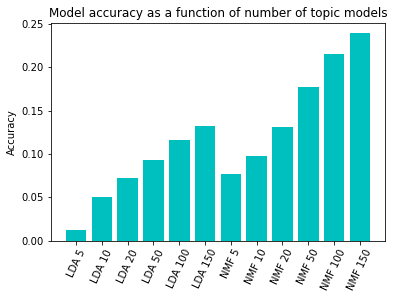

In [108]:
plt.bar(listetopic,listescore,color='c')
plt.xticks(rotation=65)
plt.ylabel('Accuracy')
plt.title('Model accuracy as a function of number of topic models')
plt.show()

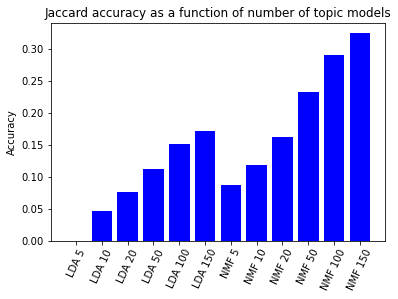

In [110]:
plt.bar(listetopic,listejaccard,color='b')
plt.xticks(rotation=65)
plt.ylabel('Accuracy')
plt.title('Jaccard accuracy as a function of number of topic models')
plt.show()